In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!file -bi /spotify-2023.csv

cannot open `/spotify-2023.csv' (No such file or directory)


In [3]:
!pip install chardet

In [4]:
import chardet

with open('/content/spotify-2023.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

print(f"Detected encoding: {encoding}")

Detected encoding: ISO-8859-1


In [5]:
data = pd.read_csv('/content/spotify-2023.csv',encoding=encoding)

In [6]:
data.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [7]:
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [8]:
def random_sample_imputation(data):
    columns_with_na= data.columns[data.isna().any()].tolist()
    for var in columns_with_na:
        random_sample_data = data[var].dropna().sample(data[var].isnull().sum(),random_state=0)
        random_sample_data.index = data[data[var].isnull()].index
        data.loc[data[var].isnull(),var] = random_sample_data
    return data


In [9]:
data_imputed= random_sample_imputation(data)

In [10]:
data_imputed.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [11]:
data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   953 non-null    ob

In [12]:
data_imputed.rename(columns = {'released_year':'Year', 'released_month':'Month', 'released_day':'Day'}, inplace = True)


In [13]:
data_imputed.head()

,track_name,artist(s)_name,artist_count,Year,Month,Day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [14]:
data_imputed['data_of_release']= pd.to_datetime(data_imputed[['Year','Month','Day']],format= '%d/%m/%Y')


In [15]:
data_imputed.head()

,track_name,artist(s)_name,artist_count,Year,Month,Day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,data_of_release
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [16]:
data_imputed = data_imputed.drop(data_imputed[['Year','Month','Day']], axis=1)

In [17]:
data_imputed.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,data_of_release
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [18]:
data_imputed= data_imputed.rename(columns= ({'artist(s)_name':'artists_name'}))

In [19]:
Top_artists=data_imputed[['track_name','artists_name','data_of_release']]


In [20]:
Top_artists = data_imputed['artists_name'].value_counts()

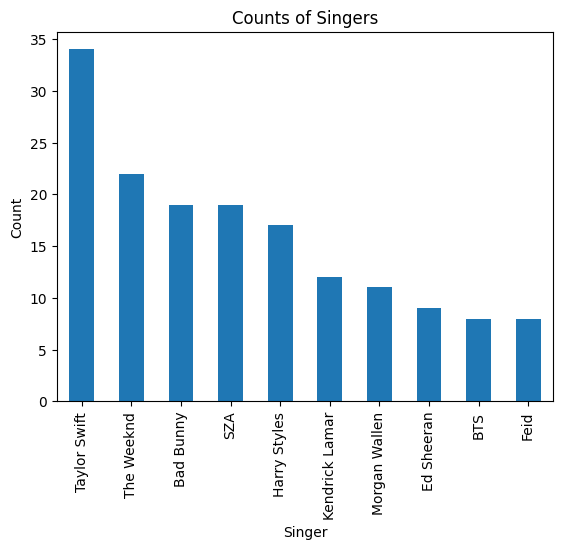

In [21]:
Top_artists.head(10).plot(kind= 'bar')
plt.xlabel('Singer')
plt.ylabel('Count')
plt.title('Counts of Singers')
plt.show()

In [22]:
HotTop= Top_artists.head(10)
HotTop

Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: artists_name, dtype: int64

<ipython-input-23-0330d42d861a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(HotTop, palette= 'husl')


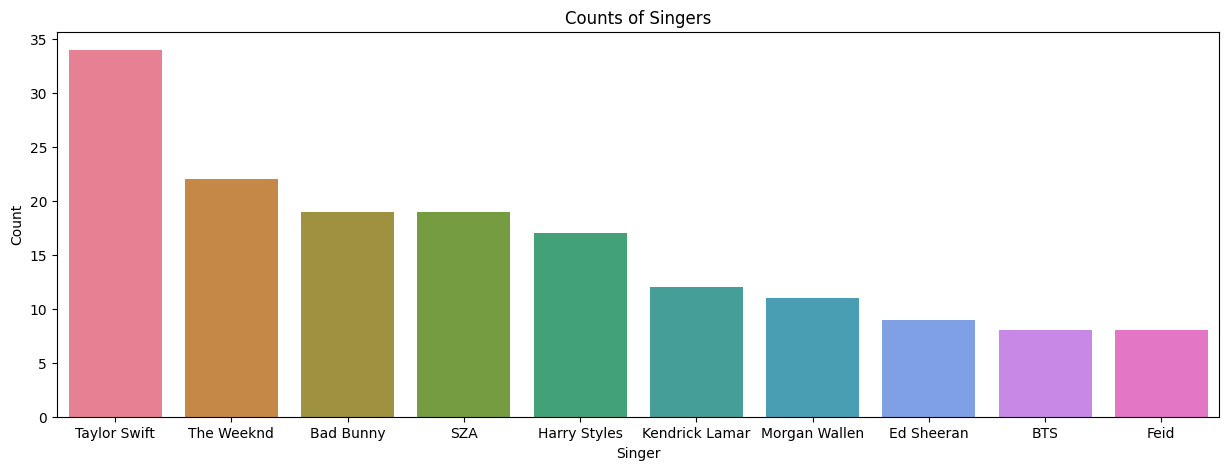

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(HotTop, palette= 'husl')
plt.xlabel('Singer')
plt.ylabel('Count')
plt.title('Counts of Singers')
plt.show()

In [24]:

Top_songs = data_imputed[['track_name','streams']]
Top_songs['streams']=pd.to_numeric(Top_songs['streams'], errors= 'coerce')
Top= Top_songs[['track_name','streams']].sort_values(by = 'streams', ascending= False).head(10)
Top


<ipython-input-24-b2f152b41053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_songs['streams']=pd.to_numeric(Top_songs['streams'], errors= 'coerce')


,track_name,streams
55,Blinding Lights,3.703895e+09
179,Shape of You,3.562544e+09
86,Someone You Loved,2.887242e+09
620,Dance Monkey,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09
162,One Dance,2.713922e+09
84,STAY (with Justin Bieber),2.665344e+09
140,Believer,2.594040e+09
725,Closer,2.591224e+09
48,Starboy,2.565530e+09


<ipython-input-25-4bcde1dd1f38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =Top['streams'],y= Top['track_name'], palette= 'viridis')


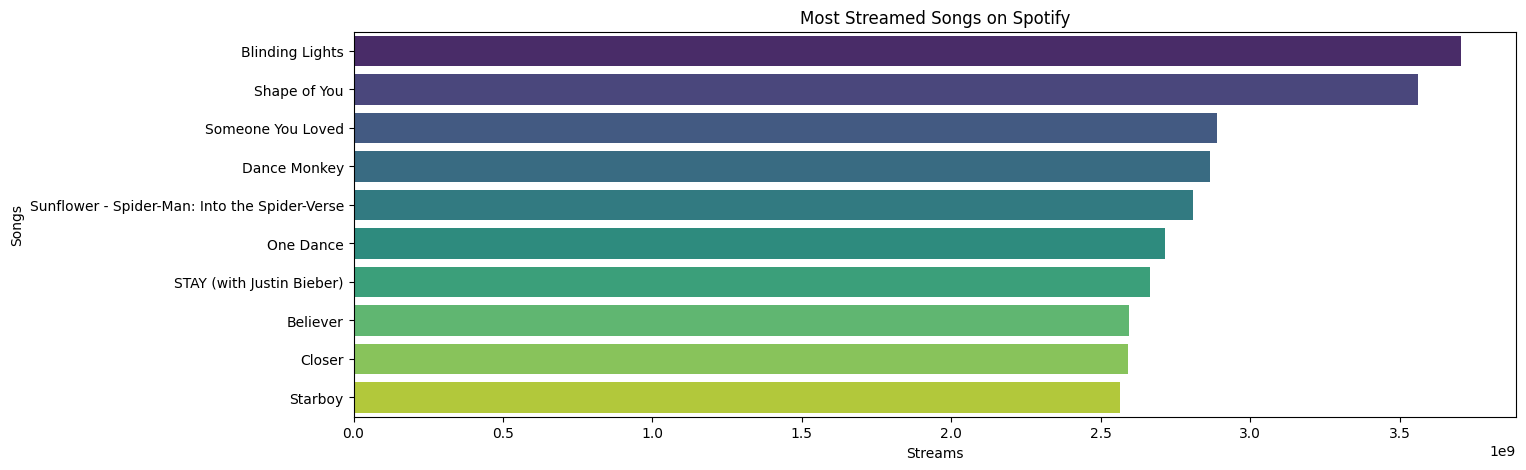

In [25]:

plt.figure(figsize=(15,5))
sns.barplot(x =Top['streams'],y= Top['track_name'], palette= 'viridis')
plt.xlabel('Streams')
plt.ylabel('Songs')
plt.title('Most Streamed Songs on Spotify')
plt.show()

In [26]:
data_imputed.columns

Index(['track_name', 'artists_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'data_of_release'],
      dtype='object')

In [27]:
Top_Platforms = data_imputed[['track_name','streams','in_spotify_charts','in_apple_charts', 'in_deezer_charts','in_shazam_charts']]
Top_Platforms['streams']=pd.to_numeric(Top_Platforms['streams'], errors= 'coerce')

<ipython-input-27-1cbdbc0ca937>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Platforms['streams']=pd.to_numeric(Top_Platforms['streams'], errors= 'coerce')


In [28]:
Hot_Platform= Top_Platforms[['track_name','streams','in_spotify_charts','in_apple_charts',
                             'in_deezer_charts','in_shazam_charts']].sort_values(by = 'streams', ascending= False).head(10)

In [29]:
Hot_Platform

,track_name,streams,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
55,Blinding Lights,3.703895e+09,69,199,20,0
179,Shape of You,3.562544e+09,10,0,7,0
86,Someone You Loved,2.887242e+09,53,125,0,0
620,Dance Monkey,2.864792e+09,0,167,6,10
41,Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09,78,117,4,69
162,One Dance,2.713922e+09,24,107,0,26
84,STAY (with Justin Bieber),2.665344e+09,36,99,31,0
140,Believer,2.594040e+09,23,121,10,31
725,Closer,2.591224e+09,0,159,0,44
48,Starboy,2.565530e+09,79,137,1,140


In [91]:
Top_Platform=Top_Platforms.drop(Top_Platforms[['track_name','streams']],axis=1)

In [92]:
Top_Platform.head(10)

,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
0,147,263,10,826
1,48,126,14,382
2,113,207,14,949
3,100,207,12,548
4,50,133,15,425
5,91,213,17,946
6,50,222,13,418
7,43,89,13,194
8,83,210,11,953
9,44,110,13,339


In [93]:
Top_Platform.dtypes

in_spotify_charts     int64
in_apple_charts       int64
in_deezer_charts      int64
in_shazam_charts     object
dtype: object

In [96]:
#Top_Platform['Deezer']= pd.to_numeric(Top_Platform['Deezer'], errors= 'coerce')
Top_Platform['Deezer'] = pd.to_numeric(Top_Platform['in_deezer_charts'], errors='coerce')
Top_Platform['Shazam'] = pd.to_numeric(Top_Platform['in_shazam_charts'], errors= 'coerce')
Top_Platform = Top_Platform.rename(columns = {'in_spotify_charts':'Spotify','in_apple_charts':'Apple'})

In [99]:

Top_Platform=Top_Platform.drop(Top_Platform[['in_deezer_charts','in_shazam_charts']],axis=1)

In [100]:
Top_Platform.head()

,Spotify,Apple,Deezer,Shazam
0,147,263,10,826.0
1,48,126,14,382.0
2,113,207,14,949.0
3,100,207,12,548.0
4,50,133,15,425.0


In [101]:
Top_Platform.dtypes

Spotify      int64
Apple        int64
Deezer       int64
Shazam     float64
dtype: object

In [102]:
cul_sum= pd.DataFrame(Top_Platform.sum())

In [103]:
cul_sum

,0
Spotify,11445.0
Apple,49469.0
Deezer,2541.0
Shazam,48260.0


In [104]:
cul_sum.head()


,0
Spotify,11445.0
Apple,49469.0
Deezer,2541.0
Shazam,48260.0


In [105]:
cul_sum.dtypes

0    float64
dtype: object

In [106]:
cul_sum.columns

RangeIndex(start=0, stop=1, step=1)

<Axes: >

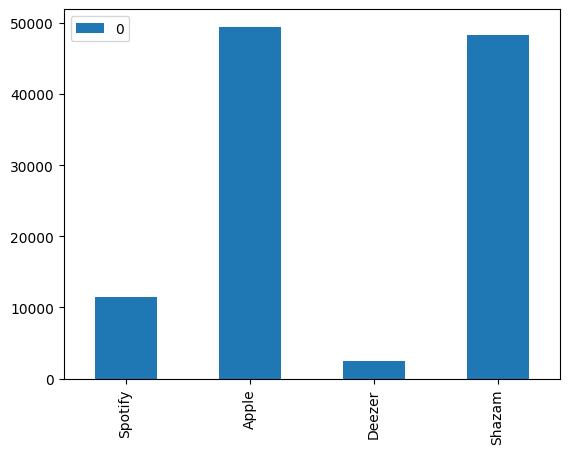

In [108]:
cul_sum.plot(kind= 'bar')


<ipython-input-109-c66e61b71669>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cul_sum1, palette = 'viridis')


<Axes: >

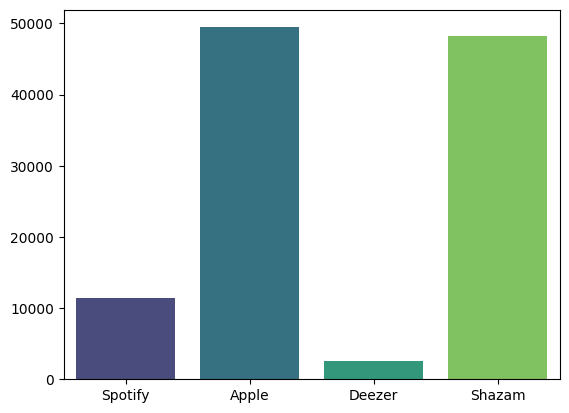

In [109]:
cul_sum1=Top_Platform.sum()
sns.barplot(cul_sum1, palette = 'viridis')

In [110]:
Hot_Year= data_imputed[['data_of_release','artists_name','track_name','streams']]
Hot_Year['streams']=pd.to_numeric(Hot_Year['streams'], errors= 'coerce')


<ipython-input-110-b757259d053d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hot_Year['streams']=pd.to_numeric(Hot_Year['streams'], errors= 'coerce')


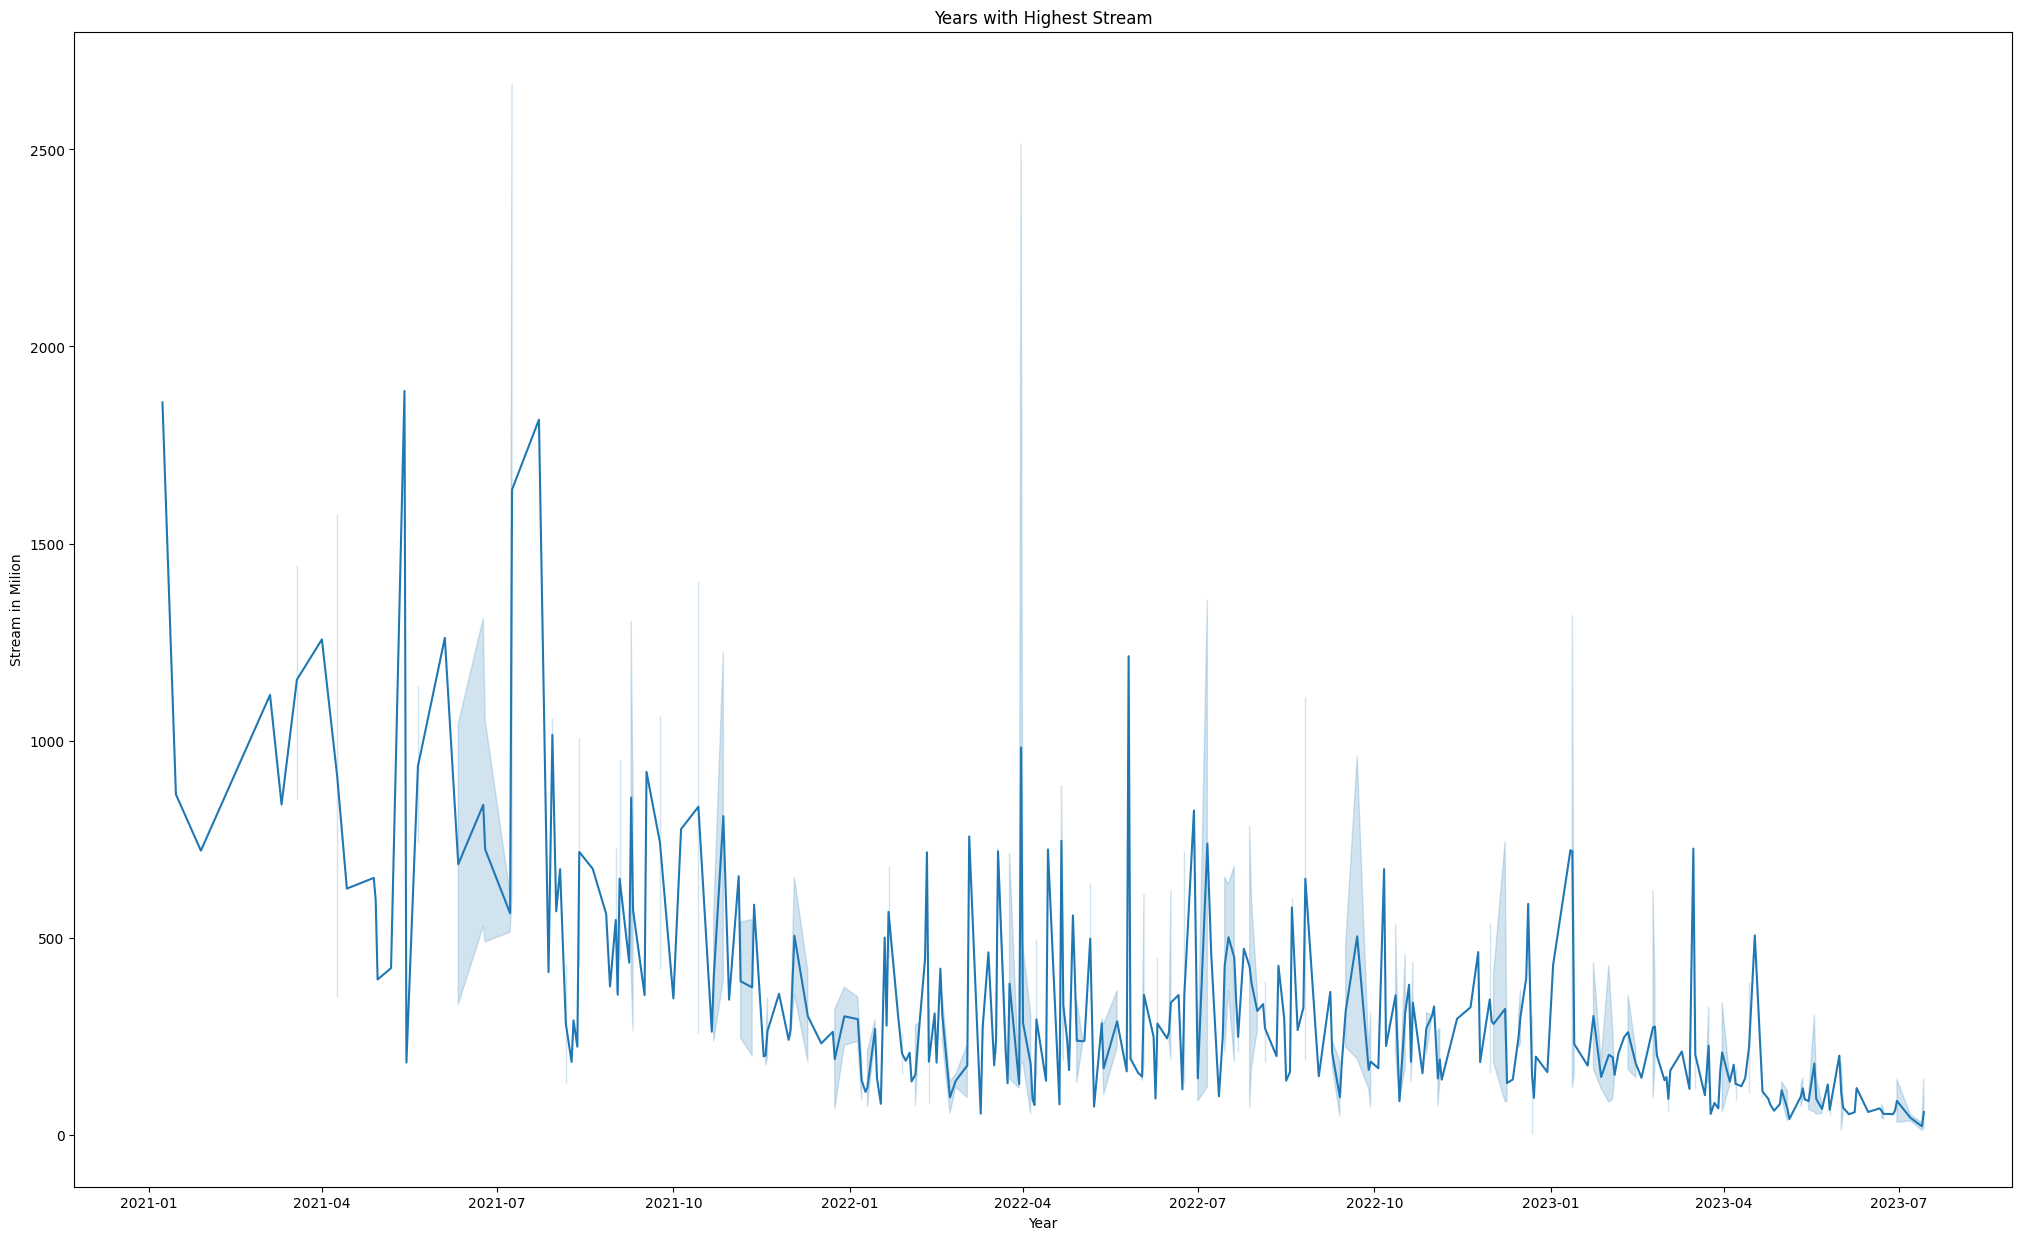

In [111]:
data_imputed['data_of_release'].max()
data_imputed['data_of_release'].min()
start_date = '2021-01-01'
end_date = '2023-12-31'
Selected_Years= Hot_Year[(Hot_Year['data_of_release'] >= start_date) & (Hot_Year['data_of_release'] <= end_date)]
plt.figure(figsize=(25,15))
sns.lineplot(x =Selected_Years['data_of_release'],y= Selected_Years['streams']/1000000)
plt.xlabel('Year')
plt.ylabel('Stream in Milion')
plt.title('Years with Highest Stream')
plt.show()

In [112]:
data_imputed.head()


,track_name,artists_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,data_of_release
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141381703,43,263,45,10,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,1474,48,133716286,48,126,58,14,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,1397,113,140003974,94,207,91,14,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,7858,100,800840817,116,207,125,12,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,3133,50,303236322,84,133,87,15,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [113]:
Correlation= data_imputed.rename(columns = ({'danceability_%':'Danceability', 'valence_%':'Valence', 'energy_%':'Energy',
       'acousticness_%':'Acousticness', 'instrumentalness_%':'Instrumentalness', 'liveness_%':'Liveness', 'speechiness_%':'Speechiness'}))
Correlation.head()
Correlation= Correlation.drop(['track_name', 'artists_name', 'artist_count', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode','data_of_release'], axis=1)
Mx= Correlation.corr()

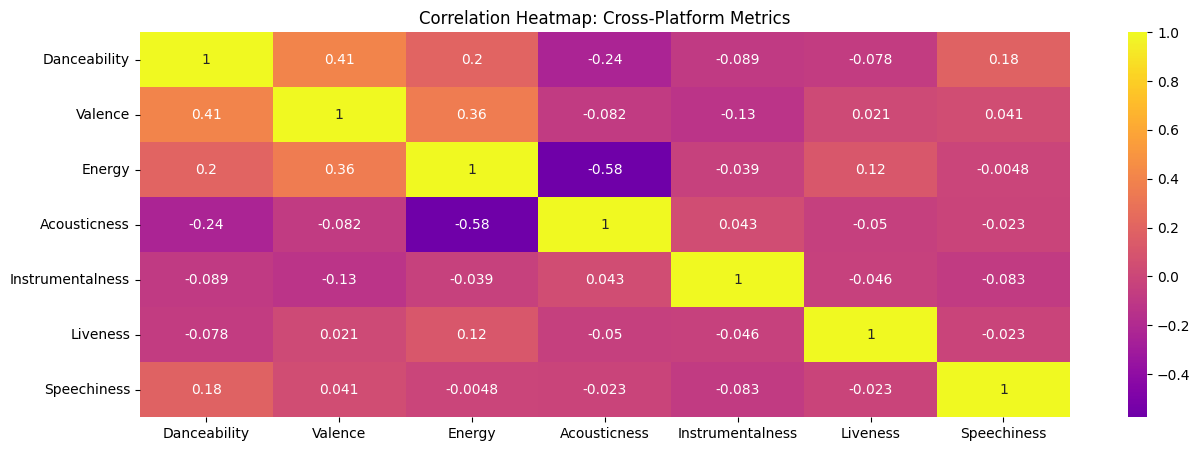

In [114]:
plt.figure(figsize=(15, 5))
sns.heatmap(Mx, annot=True, cmap='plasma', center=0)
plt.title('Correlation Heatmap: Cross-Platform Metrics')
plt.show()

In [115]:
Artist= data_imputed[['data_of_release','artists_name','track_name','streams']]

Artist_graph = Artist.groupby(Artist['data_of_release'].dt.year)['artists_name'].nunique().reset_index(name='Number_of_Singers')
singer_counts = Artist_graph[Artist_graph['Number_of_Singers'] > 20]

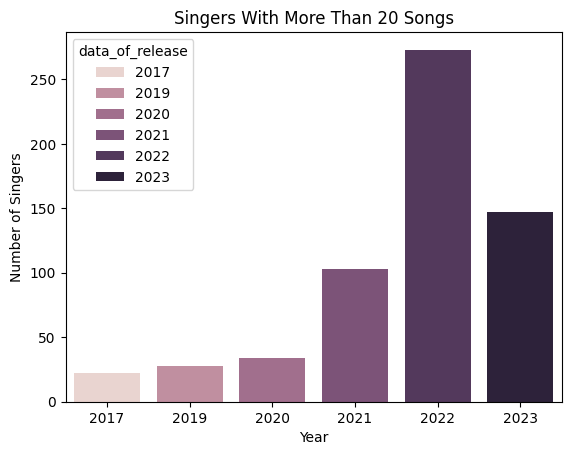

In [116]:
sns.barplot(x='data_of_release', y='Number_of_Singers', data=singer_counts, hue = 'data_of_release')
plt.xlabel('Year')
plt.ylabel('Number of Singers')
plt.title('Singers With More Than 20 Songs')
plt.show()